# Big Market Sales : Data Exploration
*The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store. This is a regression problem.*

[Data Source](https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/)

------------------

## 0. Environment Setup
Initialize pre-required modules.

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import mlxtend as mx

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor

## 1. Data Analysis

In [21]:
train_data = pd.read_csv('../data/processed/train_clean.csv')
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Item_Type_Combined_0,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,...,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.873623,0.069941,140.992782,1997.831867,2181.288914,15.168133,0.459697,0.187610,0.352693,0.093746,...,0.065118,0.109351,0.108647,0.108882,0.061950,0.109703,0.109117,0.108999,0.109117,0.109117
std,4.645893,0.049856,62.275067,8.371760,1706.499616,8.371760,0.498402,0.390423,0.477836,0.291493,...,0.246748,0.312098,0.311214,0.311509,0.241079,0.312538,0.311804,0.311656,0.311804,0.311804
min,4.555000,0.003575,31.290000,1985.000000,33.290000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.785000,0.031228,93.826500,1987.000000,834.247400,9.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.600000,0.057249,143.012800,1999.000000,1794.331000,14.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16.850000,0.097383,185.643700,2004.000000,3101.296400,26.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,28.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
train_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
Outlet_Years                   int64
Item_Fat_Content_0             int64
Item_Fat_Content_1             int64
Item_Fat_Content_2             int64
Item_Type_Combined_0           int64
Item_Type_Combined_1           int64
Item_Type_Combined_2           int64
Outlet_Size_0                  int64
Outlet_Size_1                  int64
Outlet_Size_2                  int64
Outlet_Location_Type_0         int64
Outlet_Location_Type_1         int64
Outlet_Location_Type_2         int64
Outlet_Type_0                  int64
Outlet_Type_1                  int64
Outlet_Type_2                  int64
Outlet_Type_3                  int64
Outlet_0                       int64
Outlet_1                       int64
O

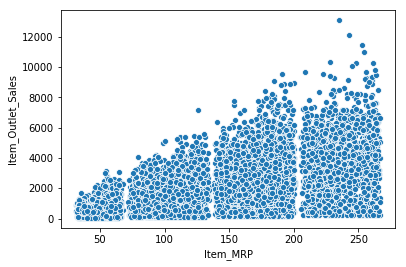

In [22]:
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=train_data)

C:\Users\danny7899\Anaconda3\envs\datasci\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


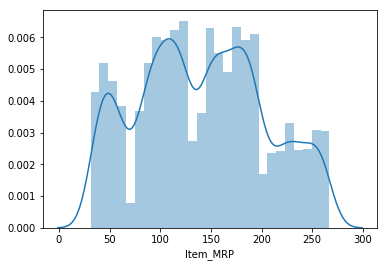

In [23]:
sns.distplot(train_data['Item_MRP'])

## 2. Model Building
To measure accuravy we will use the RMSE score.

In [62]:
# create helper function to measure accuracy
def build_model(model, data, X, y):
#     model.fit(data[X], data[y])
#     print('Accuracy\t: {0:.3%}'.format(model.score(data[X], data[y])))
    
    kfold = KFold(n_splits=10)
    
    cv_score = []
    for train, test in kfold.split(data[X]):
        train_X = data[X].iloc[train,:]
        train_y = data[y].iloc[train]
        model.fit(train_X, train_y)
        cv_score.append(model.score(data[X].iloc[test,:], data[y].iloc[test]))
#     print('CV Score\t: {0:.3%}'.format(np.mean(cv_score)))
    
    model.fit(data[X], data[y])
    print("\nModel Report")
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(data[y].values, model.predict(data[X]))))
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))

### Linear Regression


Model Report
RMSE : 1127
CV Score : Mean - 0.5603 | Std - 0.02136 | Min - 0.5102 | Max - 0.583


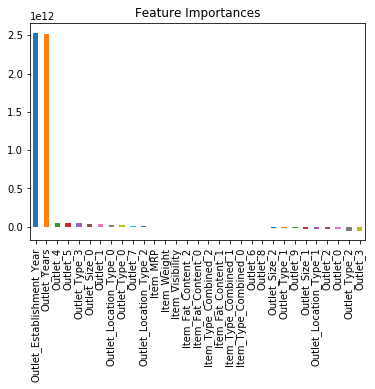

In [71]:
model = LinearRegression()
X = [x for x in train_data.columns if x not in ['Item_Outlet_Sales', 'Item_Identifier', 'Outlet_Identifier', 'Item_Type']]
y = 'Item_Outlet_Sales'
build_model(model, train_data, X, y)
feat_imp = pd.Series(model.coef_, X).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')


Model Report
RMSE : 1127
CV Score : Mean - 0.5604 | Std - 0.02133 | Min - 0.5102 | Max - 0.5829


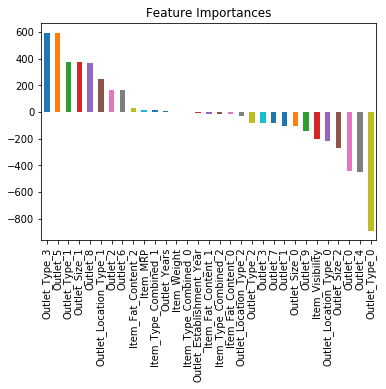

In [70]:
model = Ridge()
X = [x for x in train_data.columns if x not in ['Item_Outlet_Sales', 'Item_Identifier', 'Outlet_Identifier', 'Item_Type']]
y = 'Item_Outlet_Sales'
build_model(model, train_data, X, y)
feat_imp = pd.Series(model.coef_, X).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')


Model Report
RMSE : 1069
CV Score : Mean - 0.5943 | Std - 0.02687 | Min - 0.537 | Max - 0.6278


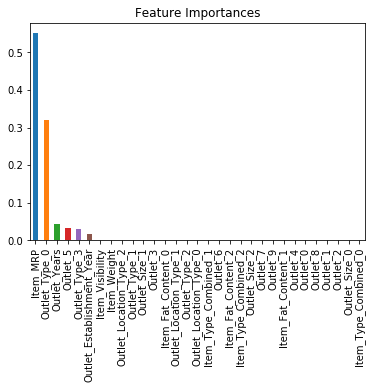

In [77]:
model = RandomForestRegressor(n_estimators=200,max_depth=6, min_samples_leaf=100,n_jobs=4)
X = [x for x in train_data.columns if x not in ['Item_Outlet_Sales', 'Item_Identifier', 'Outlet_Identifier', 'Item_Type']]
y = 'Item_Outlet_Sales'
build_model(model, train_data, X, y)
feat_imp = pd.Series(model.feature_importances_, X).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')


Model Report
RMSE : 1068
CV Score : Mean - 0.5947 | Std - 0.02653 | Min - 0.5387 | Max - 0.6276


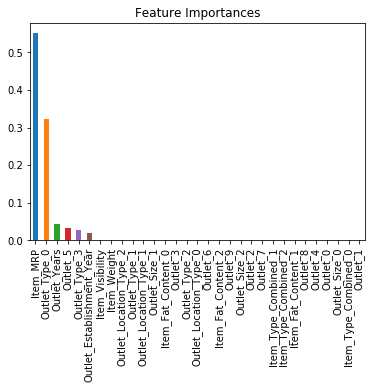

In [81]:
model = RandomForestRegressor(n_estimators=400,max_depth=6, min_samples_leaf=100,n_jobs=4)
X = [x for x in train_data.columns if x not in ['Item_Outlet_Sales', 'Item_Identifier', 'Outlet_Identifier', 'Item_Type']]
y = 'Item_Outlet_Sales'
build_model(model, train_data, X, y)
feat_imp = pd.Series(model.feature_importances_, X).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')

In [93]:
test_data = pd.read_csv('../data/processed/test_clean.csv')
pred_y = model.predict(test_data[X])
pred_y

array([1647.91205662, 1365.21186223,  572.69491215, ..., 1938.20366368,
       3644.28318809, 1297.06740044])